[1997, 1999, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


(array([ 2.,  0.,  1.,  0.,  1.,  2.,  2.,  2.,  2.,  3.,  5.,  5., 11.,
         5., 10.,  4., 14.,  8.,  8.,  6.,  5.,  9., 11., 10., 14., 30.]),
 array([1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
        2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
        2015., 2016., 2017., 2018., 2019., 2020., 2021., 2022., 2023.]),
 <BarContainer object of 26 artists>)

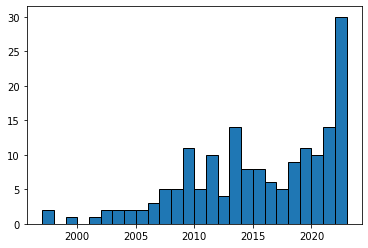

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('total-중복제거.csv', encoding='UTF-8')
x = list(set(data['Publication Year'].values))
print(x)
value = data['Publication Year'].value_counts()
y = []
for i in x:
    y.append(value[i])
plt.hist(data['Publication Year'], bins=26, edgecolor='black')

(array([  2.,   2.,   3.,   3.,   4.,   6.,   8.,  10.,  12.,  15.,  20.,
         25.,  36.,  41.,  51.,  55.,  69.,  77.,  85.,  91.,  96., 105.,
        116., 126., 140., 170.]),
 array([1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
        2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
        2015., 2016., 2017., 2018., 2019., 2020., 2021., 2022., 2023.]),
 <BarContainer object of 26 artists>)

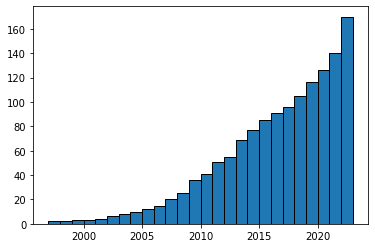

In [2]:
plt.hist(data['Publication Year'], bins=26, edgecolor='black', cumulative=True)

# Full 토큰화

In [5]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from transformers import BertTokenizer, BertModel
from nltk.stem import WordNetLemmatizer

data = pd.read_csv('data(2017-2023).csv')

stop_words = set(stopwords.words('english'))
full_keyword = []

for i in range(0, np.shape(data)[0]):
    a = re.sub('[^a-zA-Z]',' ',str(data['Abstract'][i]).lower())
    b = str(data['Author Keywords'][i]).split('; ')
    full_keyword.append(b+[a])
    
data['Full_keyword'] = full_keyword
data.to_csv('token(2017-2023)-total.csv', encoding='UTF-8')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\김진홍\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\김진홍\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\김진홍\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\김진홍\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# 방법론 필터링

In [8]:
import pandas as pd
import numpy as np

data1 = pd.read_csv('token(2017-2023)-total.csv', encoding='utf-8')
data2 = pd.read_csv('method_pool.csv', encoding='utf-8')

methodology = []
for i in range(np.shape(data1)[0]):
    a = eval(data1['Full_keyword'][i])
    method = []
    for k in range(0, len(a)):
        for j in range(np.shape(data2)[0]):
            if data2['method'][j] in a[k]:
                if data2['method'][j] not in method:
                    method.append(data2['method'][j])
    methodology.append(method)
    
data1['methodology'] = methodology
data1.to_csv('token(2017-2023)-방법론.csv', encoding='UTF-8')

# 토큰화

In [3]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from transformers import BertTokenizer, BertModel
from nltk.stem import WordNetLemmatizer

data = pd.read_csv('data(2017-2023).csv')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
word_tokens = []

for i in range(0, np.shape(data)[0]):
    a = re.sub('[^a-zA-Z]',' ',str(data['Abstract'][i]).lower()).strip()
    word_tokens.append(word_tokenize(a))

token = []
for w in word_tokens:
    t = []
    for j in w:
        if j not in stop_words:
            if j != 'roadmap' and j != 'roadmaps' and j != 'paper':
                t.append(lemmatizer.lemmatize(j))
    a = nltk.pos_tag(t)
    noun = []
    for word, pos in a:
        if 'NN' in pos:
            if len(word) >= 3:
                noun.append(word)
    token.append(list(set(noun)))

data['Abstract_token'] = token
data.to_csv('token(2017-2023).csv', encoding='UTF-8')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\김진홍\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\김진홍\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\김진홍\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\김진홍\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# 키워드 네트워크

In [8]:
import numpy as np
import pandas as pd
import nltk
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import json

import collections
data = pd.read_csv('token(2007-2016).csv')
total = []
for i in data['Abstract_token']:
    total = total + json.loads(i.replace("'",'"').replace('None', '""'))

total = collections.Counter(total)

In [9]:
common = list(filter(lambda x:x[1] >= np.shape(data)[0]/2, total.items()))

In [10]:
a = []
for i in common:
    a.append(i[0])
common = a

In [11]:
common

['paper', 'technology', 'semiconductor']

KeyboardInterrupt: 

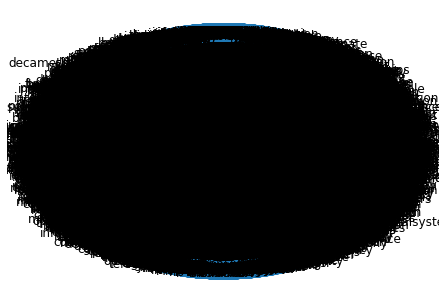

In [12]:
G = nx.Graph()

for one in data['Abstract_token']:
    one = eval(one)
    revise = []
    for i in range(0, len(one)):
        if one[i] not in common:
            revise.append(one[i])
    one = revise
    
    G.add_nodes_from(one)
    for j in range(1,len(one)-1):
        for i in range(len(one)-j):
            G.add_edge(one[i], one[i+j])
nx.draw_shell(G, with_labels=True)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
degree = nx.degree_centrality(G)
print('betweenness centrality가 가장 높은 키워드: ', max(betweenness, key=betweenness.get))
print('closeness centrality가 가장 높은 키워드: ', max(closeness, key=closeness.get))
print('degree centrality가 가장 높은 키워드: ', max(degree, key=degree.get))

In [6]:
betweenness

{'obsolescence': 0.0,
 'tool': 0.007766326943818212,
 'application': 0.007372152877716535,
 'pursue': 5.259597977369001e-08,
 'rapid': 5.259597977369001e-08,
 'paper': 0.04676555816139903,
 'review': 0.0032465662737303285,
 'timeframes': 5.259597977369001e-08,
 'development': 0.020361840141987164,
 'process': 0.040035203226801555,
 'describes': 9.748592176323184e-06,
 'range': 0.004964325399040921,
 'approach': 0.007092646856472177,
 'challenge': 0.011513363516026802,
 'term': 0.005853593349862329,
 'need': 0.005251174763431179,
 'product': 0.009525634493151726,
 'start': 6.240544904824982e-06,
 'manager': 5.777898985203639e-06,
 'integration': 0.006835104811701746,
 'method': 0.005552505894911114,
 'consideration': 0.00017940104910292505,
 'system': 0.02806892526858623,
 'support': 0.002492062954138413,
 'industry': 0.02090876701529331,
 'classification': 8.452272663284275e-05,
 'implementation': 0.0019485053985341086,
 'format': 6.27404485204604e-06,
 'situation': 5.499385067742909e-

In [7]:
nx.write_gexf(G, 'group2_network.gexf')

# LDA - 구간별 최적 토픽 개수

In [1]:
import gensim
import numpy as np
import pandas as pd
import nltk
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim import corpora

import collections
data = pd.read_csv('token(1997-2006).csv', encoding='UTF-8')

tokenized = []
detokenized = []

for i in data['Abstract_token']:
    tokenized.append(json.loads(i.replace("'",'"').replace('None', '""')))

for i in data['Abstract_token']:
    t = ' '.join(json.loads(i.replace("'",'"').replace('None', '""')))
    detokenized.append(t)
    
data['LDA_detokenize'] = detokenized
dictionary = corpora.Dictionary(tokenized)

corpus = [dictionary.doc2bow(text) for text in tokenized]

print(corpus[1])

[(10, 1), (13, 1), (23, 1), (31, 1), (40, 1), (44, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1)]


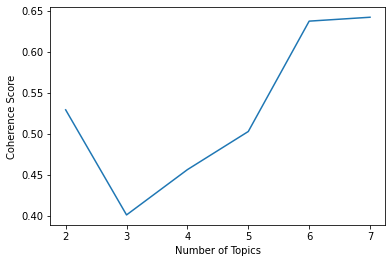

In [32]:
from gensim.models import CoherenceModel

coherence_values = []
for i in range(2, 8):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)
 
x = []
for i in range(2, 8):
    x.append(i)

plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.show()

-> group1(1997-2006) 토픽 개수는 4개

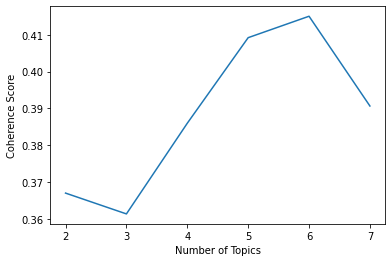

In [57]:
data = pd.read_csv('token(2007-2016).csv')

tokenized = []
detokenized = []

for i in data['Abstract_token']:
    tokenized.append(json.loads(i.replace("'",'"').replace('None', '""')))

for i in data['Abstract_token']:
    t = ' '.join(json.loads(i.replace("'",'"').replace('None', '""')))
    detokenized.append(t)
    
data['LDA_detokenize'] = detokenized
dictionary = corpora.Dictionary(tokenized)

corpus = [dictionary.doc2bow(text) for text in tokenized]

coherence_values = []
for i in range(2, 8):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)
 
x = []
for i in range(2, 8):
    x.append(i)

plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.show()

-> group2(2007-2016) 토픽 개수는 6개

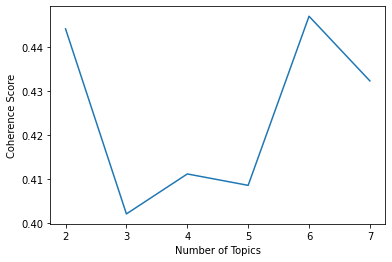

In [58]:
data = pd.read_csv('token(2017-2023).csv')

tokenized = []
detokenized = []

for i in data['Abstract_token']:
    tokenized.append(json.loads(i.replace("'",'"').replace('None', '""')))

for i in data['Abstract_token']:
    t = ' '.join(json.loads(i.replace("'",'"').replace('None', '""')))
    detokenized.append(t)
    
data['LDA_detokenize'] = detokenized
dictionary = corpora.Dictionary(tokenized)

corpus = [dictionary.doc2bow(text) for text in tokenized]

coherence_values = []
for i in range(2, 8):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)
 
x = []
for i in range(2, 8):
    x.append(i)

plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.show()

-> group3(2017-2023) 토픽 개수는 6개

# LDA - 시각화

In [2]:
import gensim
import numpy as np
import pandas as pd
import nltk
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim import corpora
import collections

data = pd.read_csv('data1_token(2007-2011).csv', encoding='cp949')

tokenized = []
detokenized = []

for i in data['Abstract_token']:
    tokenized.append(json.loads(i.replace("'",'"').replace('None', '""')))

for i in data['Abstract_token']:
    t = ' '.join(json.loads(i.replace("'",'"').replace('None', '""')))
    detokenized.append(t)
    
dictionary = corpora.Dictionary(tokenized)

corpus=[dictionary.doc2bow(word) for word in tokenized]

k=3
lda_model=gensim.models.ldamulticore.LdaMulticore(corpus,iterations=12,num_topics=k,id2word=dictionary,passes=1,workers=10)

lda_model.print_topics(num_topics=k,num_words=30)

import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis, 'group1 LDAvis.html')

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1)],
 [(4, 1),
  (6, 1),
  (14, 1),
  (19, 1),
  (24, 1),
  (28, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1)],
 [(4, 1),
  (24, 1),
  (31, 1),
  (34, 1),
  (48, 1),
  (49, 1),
  (57, 1),
  (61, 1),
  (63, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),

In [1]:
pip install pyLDAvis==2.1.2

                                              0.0/1.6 MB ? eta -:--:--
     ------------                             0.5/1.6 MB 10.2 MB/s eta 0:00:01
     --------------------------               1.1/1.6 MB 11.2 MB/s eta 0:00:01
     ---------------------------------------  1.6/1.6 MB 11.2 MB/s eta 0:00:01
     ---------------------------------------- 1.6/1.6 MB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/320.9 kB ? eta -:--:--
     -------------------------------------- 320.9/320.9 kB 9.7 MB/s eta 0:00:00
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=8dc30e0b6f90540b728c64c6d8f1b69d688820de9cf9ebe37bc6340f4acb0cf5
  Stored in directory: c:\users\김진홍\appdata\local\pip\cache\wheels\d9\93\d6\16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis
  Attempting uninstall: pyLDAvis
    Found exi

# author 국가

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data(2017-2023).csv', encoding='UTF-8')
address = data['Addresses']

nation = []
for i in address:
    a = str(i).lower().split(',')
    if ' usa' in a[-1]:
        a[-1] = 'usa'
    if 'china' in a[-1]:
        a[-1] = 'china'
    if 'tx' in a[-1]:
        a[-1] = 'usa'
    nation.append(a[-1].strip())

In [21]:
nation

['china',
 'south korea',
 'south korea',
 'south korea',
 'china',
 'china',
 'china',
 'taiwan',
 'south korea',
 'south korea',
 'taiwan',
 'south korea',
 'taiwan',
 'usa',
 'scotland',
 'usa',
 'south korea',
 'france',
 'japan',
 'jordan',
 'china',
 'india',
 'turkey',
 'south korea',
 'china',
 'china',
 'ghana',
 'usa',
 'south korea',
 'usa',
 'usa',
 'turkey',
 'china',
 'england',
 'china',
 'china',
 'usa',
 'china',
 'china',
 'singapore',
 'italy',
 'france',
 'china',
 'usa',
 'sweden',
 'south korea',
 'south korea',
 'bulgaria',
 'china',
 'scotland',
 'brazil',
 'south korea',
 'south korea',
 'turkey',
 'china',
 'south korea',
 'south korea',
 'taiwan',
 'iran',
 'south korea',
 'malaysia',
 'brazil',
 'ukraine',
 'taiwan',
 'greece',
 'france',
 'taiwan',
 'japan',
 'south korea',
 'usa',
 'germany',
 'spain',
 'china',
 'spain',
 'germany',
 'china',
 'china',
 'taiwan',
 'china']

In [22]:
dict = {}

for i in nation:
    if dict.get(i): dict[i]+=1
    else: dict[i]=1

print(dict)

{'china': 19, 'south korea': 17, 'taiwan': 7, 'usa': 8, 'scotland': 2, 'france': 3, 'japan': 2, 'jordan': 1, 'india': 1, 'turkey': 3, 'ghana': 1, 'england': 1, 'singapore': 1, 'italy': 1, 'sweden': 1, 'bulgaria': 1, 'brazil': 2, 'iran': 1, 'malaysia': 1, 'ukraine': 1, 'greece': 1, 'germany': 2, 'spain': 2}


<AxesSubplot:xlabel='count', ylabel='Class'>

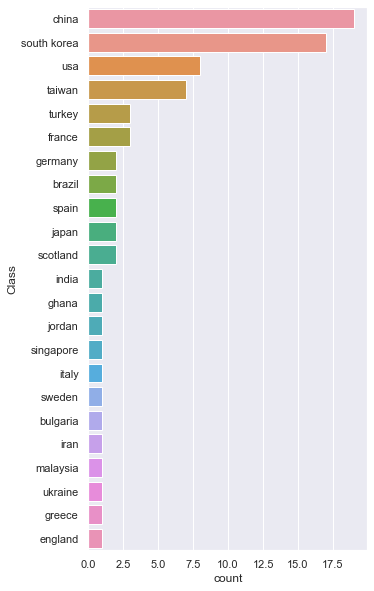

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

record = []

for key, value in dict.items():
    for i in range(value):
        record.append(key)

record = pd.DataFrame(record, columns = ['Class'])
    
sns.set(rc = {'figure.figsize':(5,10)})
sns.countplot(y='Class', data=record, order = record['Class'].value_counts().index)

# 국가별 Author keyword

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('dataset(36).csv', encoding='UTF-8')
address = data['Addresses']

nation = []
for i in address:
    a = str(i).lower().split(',')
    if ' usa' in a[-1]:
        a[-1] = 'usa'
    if 'china' in a[-1]:
        a[-1] = 'china'
    nation.append(a[-1].strip())

usa = []
china = []
korea = []
taiwan = []

for i in range(0, len(nation)):
    if nation[i] == 'usa':
        usa.append(data.loc[i])
    elif nation[i] == 'china':
        china.append(data.loc[i])
    elif nation[i] == 'south korea':
        korea.append(data.loc[i])
    elif nation[i] == 'taiwan':
        taiwan.append(data.loc[i])

In [10]:
usa = pd.DataFrame(usa, columns = data.columns)
china = pd.DataFrame(china, columns = data.columns)
korea = pd.DataFrame(korea, columns = data.columns)
taiwan = pd.DataFrame(taiwan, columns = data.columns)

In [11]:
usa.to_csv('USA.csv', encoding = 'UTF-8')
china.to_csv('CHINA.csv', encoding = 'UTF-8')
korea.to_csv('KOREA.csv', encoding = 'UTF-8')
taiwan.to_csv('TAIWAN.csv', encoding = 'UTF-8')

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('USA.csv', encoding='UTF-8')
keyword = []

for i in range(0, np.shape(data)[0]):
    key = str(data['Author Keywords'][i]).split(';')
    for j in key:
        keyword.append(j)

dict = {}

for i in keyword:
    if i != 'nan':
        if dict.get(i.lower().strip()): dict[i.lower().strip()]+=1
        else: dict[i.lower().strip()]=1

print(dict)

{'signal to noise ratio': 1, 'media': 1, 'bars': 1, 'spatial resolution': 1, 'magnetic heads': 1, 'micromagnetics': 1, 'system performance': 1, 'magnetic recording': 1, 'magnetic sensors': 1, 'spintronics': 1, 'tunnel magneto resistance (tmr) reader': 1, 'chief information officer (cio)': 1, 'strategic enterprise planning': 1, 'it governance': 1, 'information management': 1, 'enterprise 2.0': 1, 'web 2.0': 1, 'line yield': 1, 'die yield': 1, 'adr': 1, 'adc': 1, 'sem': 1, 'drsem': 1, 'ssis': 1, 'patterned wafer inspection system': 1, 'manufacturing': 1, 'ssa': 1, 'contact hole patterning': 2, 'contact mapping': 1, 'single exposure': 2, '28nm node lithography': 1, '32nm node lithography': 1, 'tolerance budget': 2, 'sraf': 1, 'double patterning': 2, 'optical proximity correction': 2, 'opc': 1, 'sub-resolution assist feature': 2, 'scattering bar': 1, 'serif': 1, 'dof': 1, 'overlapped dof': 1, 'die-to-database inspection': 1, 'heterojunction bipolar transistor': 1, 'silicon-germanium': 1, '

In [17]:
data = pd.read_csv('CHINA.csv', encoding='UTF-8')
keyword = []

for i in range(0, np.shape(data)[0]):
    key = str(data['Author Keywords'][i]).split(';')
    for j in key:
        keyword.append(j)

dict = {}

for i in keyword:
    if i != 'nan':
        if dict.get(i.lower().strip()): dict[i.lower().strip()]+=1
        else: dict[i.lower().strip()]=1

print(dict)

{'technology decision': 1, 'technology roadmap': 8, 'text mining': 5, 'patent analysis': 2, 'data-driven trm': 1, 'sao analysis': 1, 'link prediction': 1, 'hyperuricemia drug': 1, 'human uric acid oxidase': 1, 'cross-database': 1, 'evolution pathway': 1, 'fibrates': 1, 'patent review': 1, 'requirements-pull': 1, 'technology-phsh': 1, 'refrigerated containers': 1, 'technological innovation opportunity': 1, 'component': 1, 'technology function matrix': 1, 'technological evolution theory': 1, 'technology opportunity analysis': 1, 'cnt-fed': 1, 'patent management map': 1, 'emerging technology': 1, 'forecaste': 1, 'cobalt': 1, 'patent layout': 1, 'key technologies': 1, 'co-occurrence': 1, 'competition analysis': 1, 'strategy planning': 1, 'patent roadmap': 2, 'text clustering': 1, 'patent information': 1, 'patent technology': 1, 'scrapped cars': 1, 'recycling': 1, 'morphology analysis': 1, 'triz': 1, 'transmission line measurements': 1, 'technological innovation': 1, 'patents': 1, 'semantic

In [18]:
data = pd.read_csv('KOREA.csv', encoding='UTF-8')
keyword = []

for i in range(0, np.shape(data)[0]):
    key = str(data['Author Keywords'][i]).split(';')
    for j in key:
        keyword.append(j)

dict = {}

for i in keyword:
    if i != 'nan':
        if dict.get(i.lower().strip()): dict[i.lower().strip()]+=1
        else: dict[i.lower().strip()]=1

print(dict)

{'smart farm': 1, 'patent analysis': 7, 'promising vacant technology': 1, 'network analysis': 2, 'patent map': 1, 'technology road map': 1, 'retail logistics': 1, 'technology roadmap': 10, 'time series': 2, 'clustering': 2, 'latent dirichlet allocation': 2, 'patent roadmap': 1, 'patent development patterns': 1, 'tempest': 1, 'transparent display': 1, 'patent planning': 1, 'technology forecasting': 1, 'topic model': 1, 'lda': 1, 'link prediction': 2, 'data-analytics': 1, 'trm': 2, 'dependency': 1, 'association rule mining': 2, 'arm': 2, 'portfolio matrix': 1, 'service-oriented': 1, 'roadmapping': 2, 'text-mining': 1, 'citation analysis': 1, 'rfid': 1, 'smart logistics': 1, 'technology growth curve': 1, 'network': 1, 'technology roadmapping': 3, 'scenario analysis': 1, 'technolgy forecasting': 1, 'fuzzy cognitive maps': 1, 'hydrogen energy': 1, 'hydrogen supply chain': 1, 'research paper analysis': 1, 'promising technology': 1, 'futuristic data': 1, 'weak signal': 1, 'visual analysis': 1

In [19]:
data = pd.read_csv('TAIWAN.csv', encoding='UTF-8')
keyword = []

for i in range(0, np.shape(data)[0]):
    key = str(data['Author Keywords'][i]).split(';')
    for j in key:
        keyword.append(j)

dict = {}

for i in keyword:
    if i != 'nan':
        if dict.get(i.lower().strip()): dict[i.lower().strip()]+=1
        else: dict[i.lower().strip()]=1

print(dict)

{'digital home': 1, 'patent analysis': 4, 'scenario analysis': 1, 'technology roadmap': 3, 'household appliance manufacturer': 1, 'new product development': 1, 'new product planning': 1, 'china': 1, 'product development': 1, 'product planning': 1, 'patent': 1, 'tft (thin film transistor)': 1, 'led (light emitting diode)': 1, 'strategic planning': 1, 'taiwan': 1, 'patent citations': 1, 'text mining': 1, 'technology classification': 1, 'competence set expansion': 1, 'fuzzy multiple objective programming (fmop)': 1, 'artificial intelligence': 1, 'ai healthcare': 1, 'natural language processing': 1, 'industry 4.0': 1, 'logistic services': 1, 'internet of things (iot)': 1, 'omni-channel library': 1, 'market and technology maturity': 1, 'front opening unified pod (foup)': 1, 'diffuser': 1, 'air curtain': 1, 'temperature field': 1, 'purge systems': 1}


# 키워드 빈도

<AxesSubplot:xlabel='count', ylabel='Class'>

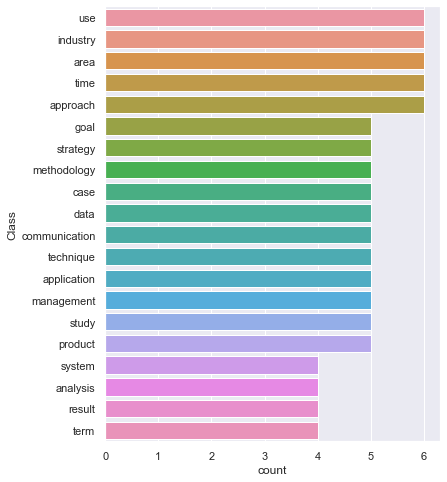

In [24]:
import numpy as np
import pandas as pd
import nltk
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import json
import seaborn as sns

import collections
data = pd.read_csv('token(1997-2006).csv')
total = []
for i in data['Abstract_token']:
    total = total + json.loads(i.replace("'",'"').replace('None', '""'))

final = []
for i in total:
    if len(i) >= 3:
        if total.count(i) < np.shape(data)[0]/2:
            final.append(i)
    
final = pd.DataFrame(final, columns = ['Class'])
    
sns.set(rc = {'figure.figsize':(6,8)})
sns.countplot(y='Class', data=final, order=final['Class'].value_counts().head(20).index)

<AxesSubplot:xlabel='count', ylabel='Class'>

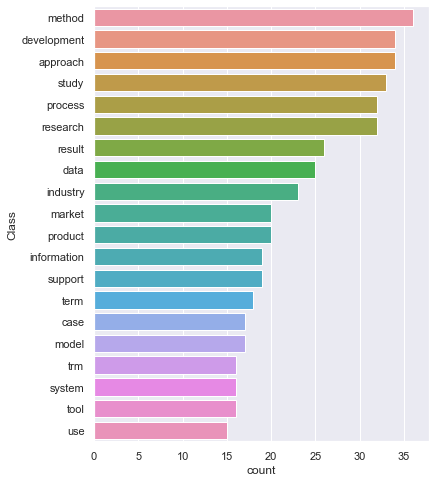

In [25]:
data = pd.read_csv('token(2007-2016).csv')
total = []
for i in data['Abstract_token']:
    total = total + json.loads(i.replace("'",'"').replace('None', '""'))

final = []
for i in total:
    if len(i) >= 3:
        if total.count(i) < np.shape(data)[0]/2:
            final.append(i)
    
final = pd.DataFrame(final, columns = ['Class'])
    
sns.set(rc = {'figure.figsize':(6,8)})
sns.countplot(y='Class', data=final, order=final['Class'].value_counts().head(20).index)

<AxesSubplot:xlabel='count', ylabel='Class'>

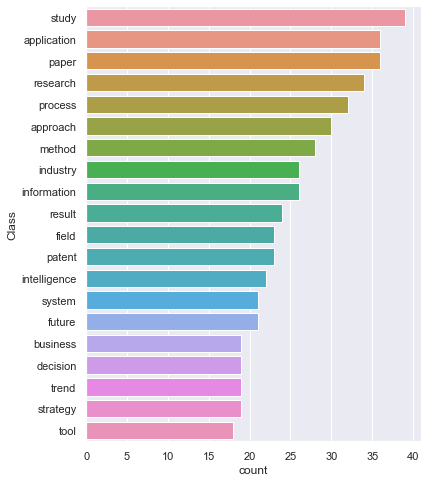

In [26]:
data = pd.read_csv('token(2017-2023).csv')
total = []
for i in data['Abstract_token']:
    total = total + json.loads(i.replace("'",'"').replace('None', '""'))

final = []
for i in total:
    if len(i) >= 3:
        if total.count(i) < np.shape(data)[0]/2:
            final.append(i)
    
final = pd.DataFrame(final, columns = ['Class'])
    
sns.set(rc = {'figure.figsize':(6,8)})
sns.countplot(y='Class', data=final, order=final['Class'].value_counts().head(20).index)

# TF-IDF 상위 키워드

In [41]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from transformers import BertTokenizer, BertModel
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import json
import collections

data = pd.read_csv('token(2017-2023).csv', encoding='UTF-8')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
word_tokens = []

for i in range(0, np.shape(data)[0]):
    a = re.sub('[^a-zA-Z]',' ',str(data['Abstract'][i]).lower()).strip()
    word_tokens.append(word_tokenize(a))

token = []
total = []
for w in word_tokens:
    t = []
    for j in w:
        if j not in stop_words: 
            if j != 'roadmap' and j != 'roadmaps':
                t.append(lemmatizer.lemmatize(j))
    a = nltk.pos_tag(t)
    noun = []
    for word, pos in a:
        if 'NN' in pos:
            if len(word) >= 3:
                noun.append(word)
    token.append(' '.join(noun))
    total = total + noun

total = collections.Counter(total)
common = list(filter(lambda x:x[1] >= np.shape(data)[0]/2, total.items()))
a = []
for i in common:
    a.append(i[0])
common = a
    
tfidf = TfidfVectorizer()
tfidf.fit_transform(token)
feature_names = tfidf.get_feature_names()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\김진홍\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\김진홍\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\김진홍\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\김진홍\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\김진홍\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [42]:
print(common)

['technology', 'opportunity', 'innovation', 'data', 'analysis', 'paper', 'approach', 'model', 'patent', 'research', 'industry', 'development', 'study', 'method', 'information', 'application', 'system', 'product']


In [43]:
def sort_coo(coo_matrix):
    """Sort a dict with highest score"""
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature, score
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

def get_keywords(vectorizer, feature_names, doc):
    """Return top k keywords from a doc using TF-IDF method"""

    #generate tf-idf for the given document
    tf_idf_vector = vectorizer.transform([doc])
    
    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only TOP_K_KEYWORDS
    keywords=extract_topn_from_vector(feature_names,sorted_items,TOP_K_KEYWORDS)
    
    return list(keywords.keys())

In [44]:
TOP_K_KEYWORDS = 50

result = []
for doc in token:
    df = {}
    df['full_text'] = doc
    df['top_keywords'] = get_keywords(tfidf, feature_names, doc)
    result.append(df)
    
final = pd.DataFrame(result)
final

,full_text,top_keywords
0,hyperuricemia disease incidence year identify ...,"[drug, opportunity, layer, hyperuricemia, tech..."
1,technology logistics industry player logistics...,"[technology, logistics, strategy, digitization..."
2,technology tool strategy expert data process c...,"[model, train, module, generates, expert, tech..."
3,technology tool technology planning advantage ...,"[data, layer, phase, mapping, technology, help..."
4,technology trm structure development process i...,"[trm, extension, innovation, source, framework..."
...,...,...
74,company transformation industry trend technolo...,"[forecast, function, development, survey, delp..."
75,paper thing researcher task process paper use ...,"[entity, recognition, challenge, feature, doma..."
76,technology attention china scholar policy make...,"[china, technology, activity, science, policy,..."
77,paper development technology application healt...,"[healthcare, product, domain, robotics, diagno..."


In [45]:
final.to_csv('tfidf(2017-2023).csv')

betweenness centrality가 가장 높은 키워드:  result
closeness centrality가 가장 높은 키워드:  result
degree centrality가 가장 높은 키워드:  result


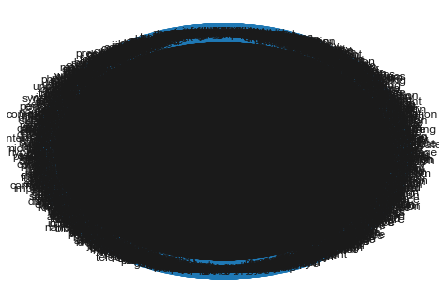

In [46]:
import numpy as np
import pandas as pd
import nltk
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import json

data = pd.read_csv('tfidf(2017-2023).csv')

G = nx.Graph()

for one in data['top_keywords']:
    one = eval(one)
    revise = []
    for i in range(0, len(one)):
        if one[i] not in common:
            revise.append(one[i])
    one = revise
    
    G.add_nodes_from(one)
    for j in range(1,len(one)-1):
        for i in range(len(one)-j):
            G.add_edge(one[i], one[i+j])
nx.draw_shell(G, with_labels=True)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
degree = nx.degree_centrality(G)
print('betweenness centrality가 가장 높은 키워드: ', max(betweenness, key=betweenness.get))
print('closeness centrality가 가장 높은 키워드: ', max(closeness, key=closeness.get))
print('degree centrality가 가장 높은 키워드: ', max(degree, key=degree.get))

In [47]:
nx.write_gexf(G, 'tfidf_network(group3).gexf')

# 분석 알고리즘 동향 분석

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('token(1997-2006)-method 정리.csv', encoding='UTF-8')
method = data['methodology']

algo = []
for i in method:
    a = eval(i)
    for j in a:
        algo.append(j)

print(set(algo))

{'ontology', 'innovation matrix', 'semantic', 'technology development envelope', 'quality function deployment', 'patent analysis', 'text mining', 'regression', 'analytic hierarchy process', 'ssm', 'delphi', 'clustering', 'linear regression', 'concept visioning', 'bibliometric'}


{'ontology': 2, 'patent analysis': 1, 'text mining': 1, 'clustering': 3, 'bibliometric': 1, 'analytic hierarchy process': 1, 'delphi': 2, 'technology development envelope': 2, 'concept visioning': 1, 'semantic': 1, 'innovation matrix': 1, 'quality function deployment': 2, 'regression': 3}


<AxesSubplot:xlabel='count', ylabel='Keyword'>

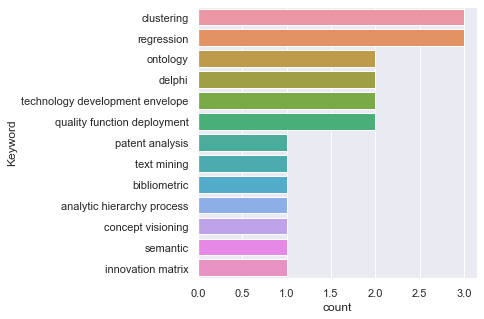

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('token(1997-2006)-method 정리.csv', encoding='UTF-8')
method = data['methodology']

algo = []
for i in method:
    a = eval(i)
    for j in a:
        algo.append(j)

dict = {}

for i in algo:
    if i != 'nan':
        if dict.get(i): dict[i]+=1
        else: dict[i]=1

print(dict)

record = []

for key, value in dict.items():
    for i in range(value):
        record.append(key)

record = pd.DataFrame(record, columns = ['Keyword'])
    
sns.set(rc = {'figure.figsize':(5,5)})
sns.countplot(y='Keyword', data=record, order = record['Keyword'].value_counts().index)

{'association rule mining': 2, 'bibliometric': 12, 'network analysis': 2, 'patent analysis': 3, 'clustering': 5, 'text mining': 12, 'principal component analysis': 2, 'swot': 6, 'morphology analysis': 1, 'technology development envelope': 1, 'analytic hierarchy process': 10, 'ontology': 1, 'patent roadmap': 2, 'co occurrence': 1, 'delphi': 6, 'patent map': 1, 'semantic': 8, 'bayesian': 4, 'fuzzy': 10, 'quality function deployment': 4, 'SAO analysis': 1, 'regression': 1, 'neural network': 1}


<AxesSubplot:xlabel='count', ylabel='Keyword'>

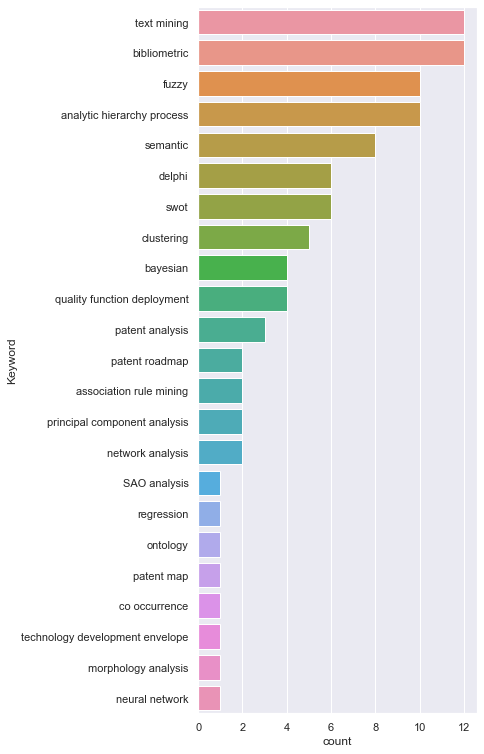

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('token(2007-2016)-method 정리.csv', encoding='UTF-8')
method = data['methodology']

algo = []
for i in method:
    a = eval(str(i))
    for j in a:
        algo.append(j)

dict = {}

for i in algo:
    if i != 'nan':
        if dict.get(i): dict[i]+=1
        else: dict[i]=1

print(dict)

record = []

for key, value in dict.items():
    for i in range(value):
        record.append(key)

record = pd.DataFrame(record, columns = ['Keyword'])
    
sns.set(rc = {'figure.figsize':(5,13)})
sns.countplot(y='Keyword', data=record, order = record['Keyword'].value_counts().index)

{'SAO analysis': 3, 'link prediction': 3, 'semantic': 4, 'patent analysis': 16, 'time series': 2, 'clustering': 2, 'latent dirichlet allocation': 6, 'generative adversarial network': 1, 'network analysis': 3, 'bidirectional encoder representation from transformers': 1, 'bibliometric': 6, 'fuzzy': 7, 'bayesian': 1, 'co occurrence': 2, 'neural network': 3, 'text mining': 10, 'patent roadmap': 2, 'generative topographic map': 2, 'triz': 1, 'morphology analysis': 1, 'delphi': 4, 'patent map': 1, 'self organizing': 1, 'analytic hierarchy process': 2, 'quality function deployment': 3, 'five forces': 1, 'ontology': 1, 'nlp': 2, 'Adock Watson-Watt method': 1, 'k-means': 1, 'recurrent neural network': 1}


<AxesSubplot:xlabel='count', ylabel='Keyword'>

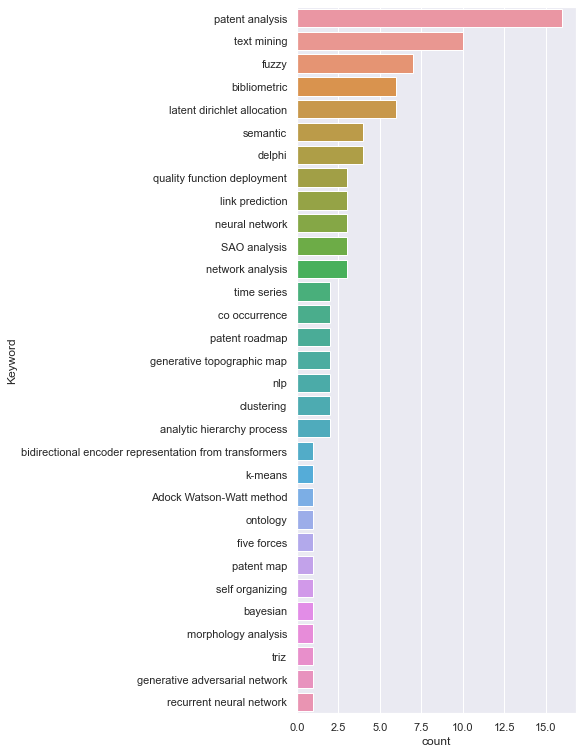

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('token(2017-2023)-method 정리.csv', encoding='UTF-8')
method = data['methodology']

algo = []
for i in method:
    a = eval(str(i))
    for j in a:
        algo.append(j)

dict = {}

for i in algo:
    if i != 'nan':
        if dict.get(i): dict[i]+=1
        else: dict[i]=1

print(dict)

record = []

for key, value in dict.items():
    for i in range(value):
        record.append(key)

record = pd.DataFrame(record, columns = ['Keyword'])
    
sns.set(rc = {'figure.figsize':(5,13)})
sns.countplot(y='Keyword', data=record, order = record['Keyword'].value_counts().index)

# 저널 빈도

{'SUSTAINABILITY': 1, 'TECHNOVATION': 1, 'APPLIED MECHANICS AND MATERIALS': 1, 'TECHNOLOGICAL FORECASTING AND SOCIAL CHANGE': 4, 'EXPERT SYSTEMS WITH APPLICATIONS': 1, 'INTERNATIONAL CONFERENCE ON HUMANITY AND SOCIAL SCIENCE': 1, 'AFFECTIVE COMPUTING AND INTELLIGENT INTERACTION': 1, 'TECHNOLOGY ANALYSIS AND STRATEGIC MANAGEMENT': 2, 'INTERNATIONAL CONFERENCE ON INTELLIGENT DESIGN': 1, 'R&D MANAGEMENT': 1, 'MATHEMATICS': 1, 'ADVANCED ENGINEERING INFORMATICS': 1, 'APPLIED SCIENCES-BASEL': 1, 'IEEE TRANSACTIONS ON ENGINEERING MANAGEMENT': 3, 'SCIENCE AND PUBLIC POLICY': 1, 'COMPUTERS AND INDUSTRIAL ENGINEERING': 1, 'IEEE INTERNATIONAL CONFERENCE ON INDUSTRIAL ENGINEERING AND ENGINEERING MANAGEMENT': 1, 'ADVANCES ON ARTIFICIAL INTELLIGENCE, KNOWLEDGE ENGINEERING AND DATA BASES, PROCEEDINGS': 1, 'COMPUTERS IN INDUSTRY': 1, 'IEEE ACCESS': 1, 'INTERNATIONAL CONFERENCE ON MANAGEMENT SCIENCE AND ENGINEERING': 1, 'INTERNATIONAL MULTI-CONFERENCE ON COMPLEXITY, INFORMATICS AND CYBERNETICS': 1, 'EU

<AxesSubplot:xlabel='count', ylabel='Journal'>

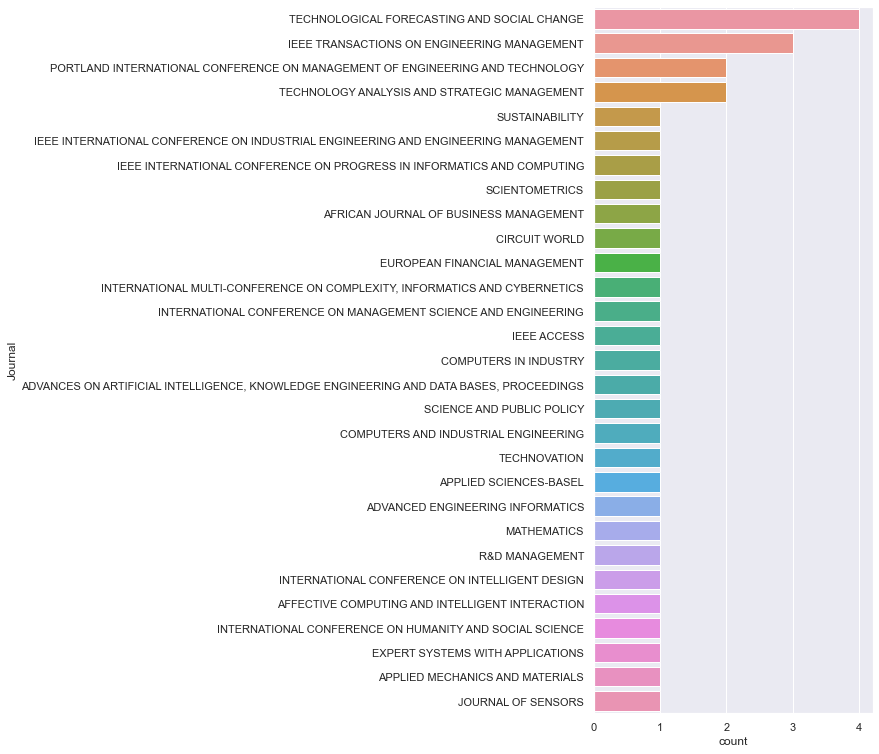

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('dataset(36).csv', encoding='UTF-8')
journal = data['Journal']

name = []
for i in journal:
    a = str(i).upper()
    name.append(a)

dict = {}

for i in name:
    if i != 'nan':
        if dict.get(i): dict[i]+=1
        else: dict[i]=1

print(dict)

record = []

for key, value in dict.items():
    for i in range(value):
        record.append(key)

record = pd.DataFrame(record, columns = ['Journal'])
    
sns.set(rc = {'figure.figsize':(5,13)})
sns.countplot(y='Journal', data=record, order = record['Journal'].value_counts().index)